[10 mins to Panda - Tutorial](https://pandas.pydata.org/docs/user_guide/10min.html#minutes-to-pandas)

In [1]:
import numpy as np

import pandas as pd

Pandas provides two types of classes for handling data:

```Series:``` a one-dimensional labeled array holding data of any type
such as integers, strings, Python objects etc.

```DataFrame:``` a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

Creating a ```Series``` by passing a list of values, letting pandas create a default ```RangeIndex```.

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a ```DataFrame``` by passing a NumPy array with a datetime index using ```date_range()``` and labeled columns:

In [4]:
dates = pd.date_range("20250101", periods=6)
dates

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2025-01-01,1.057288,1.347022,-1.098558,-2.044356
2025-01-02,1.354330,1.239620,0.873275,2.142095
2025-01-03,1.468160,0.184803,1.037846,-0.059944
2025-01-04,0.953387,0.224895,0.229933,1.638036
2025-01-05,0.546557,-0.252911,0.214980,1.566067
2025-01-06,0.910378,0.072719,1.091743,1.528250


Creating a ```DataFrame``` by passing a dictionary of objects where the keys are the column labels and the values are the column values.

In [17]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20250102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2, df2.dtypes

(     A          B    C  D      E    F
 0  1.0 2025-01-02  1.0  3   test  foo
 1  1.0 2025-01-02  1.0  3  train  foo
 2  1.0 2025-01-02  1.0  3   test  foo
 3  1.0 2025-01-02  1.0  3  train  foo,
 A          float64
 B    datetime64[s]
 C          float32
 D            int32
 E         category
 F           object
 dtype: object)

__Viewing data__

Use ```DataFrame.head()``` and ```DataFrame.tail()``` to view the top and bottom rows of the frame respectively:

In [23]:
df.head(1), df.tail(1), df.index, df.columns

(                   A         B         C         D
 2025-01-01  1.057288  1.347022 -1.098558 -2.044356,
                    A         B         C        D
 2025-01-06  0.910378  0.072719  1.091743  1.52825,
 DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
                '2025-01-05', '2025-01-06'],
               dtype='datetime64[ns]', freq='D'),
 Index(['A', 'B', 'C', 'D'], dtype='object'))

Return a ```NumPy``` representation of the underlying data with ```DataFrame.to_numpy()``` without the index or column labels:

In [24]:
df.to_numpy()

array([[ 1.05728833,  1.34702213, -1.09855755, -2.04435614],
       [ 1.35433033,  1.23962022,  0.87327513,  2.1420949 ],
       [ 1.46815953,  0.1848028 ,  1.03784554, -0.05994445],
       [ 0.95338732,  0.22489483,  0.22993286,  1.6380356 ],
       [ 0.54655726, -0.25291108,  0.21497978,  1.56606653],
       [ 0.91037803,  0.07271887,  1.09174301,  1.52825009]])

```describe()``` shows a quick statistic summary of your data:

In [26]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,1.048350,0.469358,0.391536,0.795024
std,0.331600,0.660807,0.826770,1.578002
min,0.546557,-0.252911,-1.098558,-2.044356
25%,0.921130,0.100740,0.218718,0.337104
50%,1.005338,0.204849,0.551604,1.547158
75%,1.280070,0.985939,0.996703,1.620043
max,1.468160,1.347022,1.091743,2.142095


In [27]:
#Transposing your data
df.T

,2025-01-01,2025-01-02,2025-01-03,2025-01-04,2025-01-05,2025-01-06
A,1.057288,1.354330,1.468160,0.953387,0.546557,0.910378
B,1.347022,1.239620,0.184803,0.224895,-0.252911,0.072719
C,-1.098558,0.873275,1.037846,0.229933,0.214980,1.091743
D,-2.044356,2.142095,-0.059944,1.638036,1.566067,1.528250


In [29]:
#DataFrame.sort_index() sorts by an axis:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2025-01-01,-2.044356,-1.098558,1.347022,1.057288
2025-01-02,2.142095,0.873275,1.239620,1.354330
2025-01-03,-0.059944,1.037846,0.184803,1.468160
2025-01-04,1.638036,0.229933,0.224895,0.953387
2025-01-05,1.566067,0.214980,-0.252911,0.546557
2025-01-06,1.528250,1.091743,0.072719,0.910378


In [30]:
#DataFrame.sort_values() sorts by values:
df.sort_values(by="B")

,A,B,C,D
2025-01-05,0.546557,-0.252911,0.214980,1.566067
2025-01-06,0.910378,0.072719,1.091743,1.528250
2025-01-03,1.468160,0.184803,1.037846,-0.059944
2025-01-04,0.953387,0.224895,0.229933,1.638036
2025-01-02,1.354330,1.239620,0.873275,2.142095
2025-01-01,1.057288,1.347022,-1.098558,-2.044356


__Getitem ([])__

For a ```DataFrame```, passing a single label selects a columns and yields a ```Series``` equivalent to ```df.A```:

In [36]:
df["B"], df[0:3], df["2025-01-05":"2025-01-06"]

(2025-01-01    1.347022
 2025-01-02    1.239620
 2025-01-03    0.184803
 2025-01-04    0.224895
 2025-01-05   -0.252911
 2025-01-06    0.072719
 Freq: D, Name: B, dtype: float64,
                    A         B         C         D
 2025-01-01  1.057288  1.347022 -1.098558 -2.044356
 2025-01-02  1.354330  1.239620  0.873275  2.142095
 2025-01-03  1.468160  0.184803  1.037846 -0.059944,
                    A         B         C         D
 2025-01-05  0.546557 -0.252911  0.214980  1.566067
 2025-01-06  0.910378  0.072719  1.091743  1.528250)

In [38]:
# Selecting a row matching a label:

df.loc[dates[0]]

A    1.057288
B    1.347022
C   -1.098558
D   -2.044356
Name: 2025-01-01 00:00:00, dtype: float64

In [39]:
# Selecting all rows (:) with a select column labels:

df.loc[:, ["A", "B"]]

,A,B
2025-01-01,1.057288,1.347022
2025-01-02,1.354330,1.239620
2025-01-03,1.468160,0.184803
2025-01-04,0.953387,0.224895
2025-01-05,0.546557,-0.252911
2025-01-06,0.910378,0.072719


In [42]:
#For label slicing, both endpoints are included:

df.loc["20250102":"20250104", ["A", "B"]]

,A,B
2025-01-02,1.354330,1.239620
2025-01-03,1.468160,0.184803
2025-01-04,0.953387,0.224895


In [43]:
#Selecting a single row and column label returns a scalar:

df.loc[dates[0], "A"]

np.float64(1.0572883252817198)

In [44]:
#For getting fast access to a scalar (equivalent to the prior method):

df.at[dates[0], "A"]

np.float64(1.0572883252817198)

__Selection by position__

Select via the position of the passed integers:

In [45]:
df.iloc[3]

A    0.953387
B    0.224895
C    0.229933
D    1.638036
Name: 2025-01-04 00:00:00, dtype: float64

In [46]:
#Integer slices acts similar to NumPy/Python:

df.iloc[3:5, 0:2]

,A,B
2025-01-04,0.953387,0.224895
2025-01-05,0.546557,-0.252911


In [48]:
#Lists of integer position locations:

df.iloc[[1, 2, 4], [0, 2]]

,A,C
2025-01-02,1.354330,0.873275
2025-01-03,1.468160,1.037846
2025-01-05,0.546557,0.214980


In [49]:
# For slicing rows explicitly:

df.iloc[1:3, :]

,A,B,C,D
2025-01-02,1.35433,1.239620,0.873275,2.142095
2025-01-03,1.46816,0.184803,1.037846,-0.059944


In [50]:
# For getting a value explicitly:

df.iloc[1, 1]

np.float64(1.2396202166423163)

In [51]:
# For getting fast access to a scalar (equivalent to the prior method):

df.iat[1, 1]

np.float64(1.2396202166423163)

__Boolean indexing__

Select rows where ```df.A``` is greater than ```0```

In [52]:
df[df["A"] > 0]

,A,B,C,D
2025-01-01,1.057288,1.347022,-1.098558,-2.044356
2025-01-02,1.354330,1.239620,0.873275,2.142095
2025-01-03,1.468160,0.184803,1.037846,-0.059944
2025-01-04,0.953387,0.224895,0.229933,1.638036
2025-01-05,0.546557,-0.252911,0.214980,1.566067
2025-01-06,0.910378,0.072719,1.091743,1.528250


In [53]:
#Selecting values from a DataFrame where a boolean condition is met:

df[df > 0]

,A,B,C,D
2025-01-01,1.057288,1.347022,NaN,NaN
2025-01-02,1.354330,1.239620,0.873275,2.142095
2025-01-03,1.468160,0.184803,1.037846,NaN
2025-01-04,0.953387,0.224895,0.229933,1.638036
2025-01-05,0.546557,NaN,0.214980,1.566067
2025-01-06,0.910378,0.072719,1.091743,1.528250


In [54]:
# Using isin() method for filtering

df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]

df2

,A,B,C,D,E
2025-01-01,1.057288,1.347022,-1.098558,-2.044356,one
2025-01-02,1.354330,1.239620,0.873275,2.142095,one
2025-01-03,1.468160,0.184803,1.037846,-0.059944,two
2025-01-04,0.953387,0.224895,0.229933,1.638036,three
2025-01-05,0.546557,-0.252911,0.214980,1.566067,four
2025-01-06,0.910378,0.072719,1.091743,1.528250,three


In [55]:
df2[df2["E"].isin(["two", "four"])]

df2

,A,B,C,D,E
2025-01-01,1.057288,1.347022,-1.098558,-2.044356,one
2025-01-02,1.354330,1.239620,0.873275,2.142095,one
2025-01-03,1.468160,0.184803,1.037846,-0.059944,two
2025-01-04,0.953387,0.224895,0.229933,1.638036,three
2025-01-05,0.546557,-0.252911,0.214980,1.566067,four
2025-01-06,0.910378,0.072719,1.091743,1.528250,three


__Setting__

Setting a new column automatically aligns the data by the indexes:

In [57]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20250102", periods=6))
s1

2025-01-02    1
2025-01-03    2
2025-01-04    3
2025-01-05    4
2025-01-06    5
2025-01-07    6
Freq: D, dtype: int64

In [74]:
df["F"] = s1
df

,A,B,C,D,F
2025-01-01,0.000000,0.000000,-1.098558,5.0,NaN
2025-01-02,1.354330,1.239620,0.873275,5.0,1.0
2025-01-03,1.468160,0.184803,1.037846,5.0,2.0
2025-01-04,0.953387,0.224895,0.229933,5.0,3.0
2025-01-05,0.546557,-0.252911,0.214980,5.0,4.0
2025-01-06,0.910378,0.072719,1.091743,5.0,5.0


In [75]:
# Setting values by label:

df.at[dates[0], "A"] = 0
df

,A,B,C,D,F
2025-01-01,0.000000,0.000000,-1.098558,5.0,NaN
2025-01-02,1.354330,1.239620,0.873275,5.0,1.0
2025-01-03,1.468160,0.184803,1.037846,5.0,2.0
2025-01-04,0.953387,0.224895,0.229933,5.0,3.0
2025-01-05,0.546557,-0.252911,0.214980,5.0,4.0
2025-01-06,0.910378,0.072719,1.091743,5.0,5.0


In [76]:
#Setting values by position:

df.iat[0, 1] = 0
df

,A,B,C,D,F
2025-01-01,0.000000,0.000000,-1.098558,5.0,NaN
2025-01-02,1.354330,1.239620,0.873275,5.0,1.0
2025-01-03,1.468160,0.184803,1.037846,5.0,2.0
2025-01-04,0.953387,0.224895,0.229933,5.0,3.0
2025-01-05,0.546557,-0.252911,0.214980,5.0,4.0
2025-01-06,0.910378,0.072719,1.091743,5.0,5.0


In [77]:
# Setting by assigning with a NumPy array:

df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D,F
2025-01-01,0.000000,0.000000,-1.098558,5.0,NaN
2025-01-02,1.354330,1.239620,0.873275,5.0,1.0
2025-01-03,1.468160,0.184803,1.037846,5.0,2.0
2025-01-04,0.953387,0.224895,0.229933,5.0,3.0
2025-01-05,0.546557,-0.252911,0.214980,5.0,4.0
2025-01-06,0.910378,0.072719,1.091743,5.0,5.0


In [78]:
#A where operation with setting:

df2 = df.copy()
df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2025-01-01,0.000000,0.000000,-1.098558,-5.0,NaN
2025-01-02,-1.354330,-1.239620,-0.873275,-5.0,-1.0
2025-01-03,-1.468160,-0.184803,-1.037846,-5.0,-2.0
2025-01-04,-0.953387,-0.224895,-0.229933,-5.0,-3.0
2025-01-05,-0.546557,-0.252911,-0.214980,-5.0,-4.0
2025-01-06,-0.910378,-0.072719,-1.091743,-5.0,-5.0


__Missing data__

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [84]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2025-01-01,0.000000,0.000000,-1.098558,5.0,NaN,1.0
2025-01-02,1.354330,1.239620,0.873275,5.0,1.0,1.0
2025-01-03,1.468160,0.184803,1.037846,5.0,2.0,NaN
2025-01-04,0.953387,0.224895,0.229933,5.0,3.0,NaN


```DataFrame.dropna()``` drops any rows that have missing data:

In [86]:
df1.dropna(how="any")

,A,B,C,D,F,E
2025-01-02,1.35433,1.23962,0.873275,5.0,1.0,1.0


```DataFrame.fillna()``` fills missing data:

In [89]:
df1.fillna(value=5)
df1

,A,B,C,D,F,E
2025-01-01,0.000000,0.000000,-1.098558,5.0,NaN,1.0
2025-01-02,1.354330,1.239620,0.873275,5.0,1.0,1.0
2025-01-03,1.468160,0.184803,1.037846,5.0,2.0,NaN
2025-01-04,0.953387,0.224895,0.229933,5.0,3.0,NaN


In [90]:
# isna() gets the boolean mask where values are nan:

pd.isna(df1)

,A,B,C,D,F,E
2025-01-01,False,False,False,False,True,False
2025-01-02,False,False,False,False,False,False
2025-01-03,False,False,False,False,False,True
2025-01-04,False,False,False,False,False,True


__Stats__

Operations in general exclude missing data.

Calculate the mean value for each column:

In [92]:
df.mean()

A    0.872135
B    0.244854
C    0.391536
D    5.000000
F    3.000000
dtype: float64

In [93]:
# Calculate the mean value for each row:

df.mean(axis=1)

2025-01-01    0.975361
2025-01-02    1.893445
2025-01-03    1.938162
2025-01-04    1.881643
2025-01-05    1.901725
2025-01-06    2.414968
Freq: D, dtype: float64

Operating with another ```Series``` or ```DataFrame``` with a different index or column will align the result with the union of the index or column labels. In addition, pandas automatically broadcasts along the specified dimension and will fill unaligned labels with np.nan.

In [96]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2025-01-01    NaN
2025-01-02    NaN
2025-01-03    1.0
2025-01-04    3.0
2025-01-05    5.0
2025-01-06    NaN
Freq: D, dtype: float64

In [97]:
df.sub(s, axis="index")

,A,B,C,D,F
2025-01-01,NaN,NaN,NaN,NaN,NaN
2025-01-02,NaN,NaN,NaN,NaN,NaN
2025-01-03,0.468160,-0.815197,0.037846,4.0,1.0
2025-01-04,-2.046613,-2.775105,-2.770067,2.0,0.0
2025-01-05,-4.453443,-5.252911,-4.785020,0.0,-1.0
2025-01-06,NaN,NaN,NaN,NaN,NaN


__User defined functions__

```DataFrame.agg()``` and ```DataFrame.transform()``` applies a user defined function that reduces or broadcasts its result respectively.

In [100]:
df.agg(lambda x: np.mean(x) * 5.6)
df.transform(lambda x: x * 101.2)
df

,A,B,C,D,F
2025-01-01,0.000000,0.000000,-1.098558,5.0,NaN
2025-01-02,1.354330,1.239620,0.873275,5.0,1.0
2025-01-03,1.468160,0.184803,1.037846,5.0,2.0
2025-01-04,0.953387,0.224895,0.229933,5.0,3.0
2025-01-05,0.546557,-0.252911,0.214980,5.0,4.0
2025-01-06,0.910378,0.072719,1.091743,5.0,5.0


__Value Counts__

In [102]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    5
2    6
3    2
4    1
5    1
6    4
7    1
8    0
9    3
dtype: int64

In [103]:
s.value_counts()

1    3
2    2
5    1
6    1
4    1
0    1
3    1
Name: count, dtype: int64

__String Methods__

```Series``` is equipped with a set of string processing methods in the ```str``` attribute that make it easy to operate on each element of the array, as in the code snippet below. 

In [106]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

__Concat__

In [108]:
#Concatenating pandas objects together row-wise with concat():

df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.859412,-0.303309,-1.081109,0.749928
1,-1.296200,0.469228,0.944965,0.946880
2,-0.161882,1.093814,1.391713,-0.828481
3,1.035468,0.144621,-0.684445,0.417205
4,0.367079,-0.418874,-1.927840,0.051325
5,-0.621358,0.740551,-0.686130,-1.442465
6,2.163945,-0.285153,0.580348,0.710652
7,0.572205,0.405955,-1.297439,1.514511
8,-0.168829,-0.709642,1.201947,-0.833539
9,-0.078153,0.912929,-0.088837,0.826733


In [110]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.859412 -0.303309 -1.081109  0.749928
 1 -1.296200  0.469228  0.944965  0.946880
 2 -0.161882  1.093814  1.391713 -0.828481,
           0         1         2         3
 3  1.035468  0.144621 -0.684445  0.417205
 4  0.367079 -0.418874 -1.927840  0.051325
 5 -0.621358  0.740551 -0.686130 -1.442465
 6  2.163945 -0.285153  0.580348  0.710652,
           0         1         2         3
 7  0.572205  0.405955 -1.297439  1.514511
 8 -0.168829 -0.709642  1.201947 -0.833539
 9 -0.078153  0.912929 -0.088837  0.826733]

In [111]:
pd.concat(pieces)

,0,1,2,3
0,0.859412,-0.303309,-1.081109,0.749928
1,-1.296200,0.469228,0.944965,0.946880
2,-0.161882,1.093814,1.391713,-0.828481
3,1.035468,0.144621,-0.684445,0.417205
4,0.367079,-0.418874,-1.927840,0.051325
5,-0.621358,0.740551,-0.686130,-1.442465
6,2.163945,-0.285153,0.580348,0.710652
7,0.572205,0.405955,-1.297439,1.514511
8,-0.168829,-0.709642,1.201947,-0.833539
9,-0.078153,0.912929,-0.088837,0.826733


__Join__

```merge()``` enables SQL style join types along specific columns.

In [112]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left, right

(   key  lval
 0  foo     1
 1  foo     2,
    key  rval
 0  foo     4
 1  foo     5)

In [115]:
m = pd.merge(left, right, on="key")
m

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


__Grouping__

By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria

- Applying a function to each group independently

- Combining the results into a data structure

In [119]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.368402,1.986035
1,bar,one,0.311401,0.488882
2,foo,two,0.176324,0.088737
3,bar,three,-0.993837,0.127280
4,foo,two,-0.326209,-2.042995
5,bar,two,-0.903852,0.567511
6,foo,one,0.686981,0.146962
7,foo,three,-1.097457,0.094883


In [120]:
# Grouping by a column label, selecting column labels, and then applying the DataFrameGroupBy.sum() function to the resulting groups:

df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-1.586288,1.183673
foo,-0.191959,0.273623


In [121]:
# Grouping by multiple columns label forms MultiIndex.

df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.311401  0.488882
    three -0.993837  0.127280
    two   -0.903852  0.567511
foo one    1.055383  2.132997
    three -1.097457  0.094883
    two   -0.149885 -1.954258

__Reshaping__

___Stack___

In [128]:
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]

index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.345185  0.618897
      two    -0.695735 -0.906219
baz   one     0.699023  0.475571
      two     1.236617 -1.558161

In [129]:
# The stack() method “compresses” a level in the DataFrame’s columns:

stacked = df2.stack(future_stack=True)
stacked

first  second   
bar    one     A   -0.345185
               B    0.618897
       two     A   -0.695735
               B   -0.906219
baz    one     A    0.699023
               B    0.475571
       two     A    1.236617
               B   -1.558161
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [130]:
stacked.unstack()

A         B
first second                    
bar   one    -0.345185  0.618897
      two    -0.695735 -0.906219
baz   one     0.699023  0.475571
      two     1.236617 -1.558161

In [133]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.345185  0.699023
       B  0.618897  0.475571
two    A -0.695735  1.236617
       B -0.906219 -1.558161

__Pivot tables__

In [135]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-1.459284,1.362353
1,one,B,foo,0.136446,-1.935248
2,two,C,foo,1.111712,0.461303
3,three,A,bar,1.468884,-1.564753
4,one,B,bar,-1.022354,0.421910
5,one,C,bar,-0.339476,-0.349605
6,two,A,foo,2.579724,0.175953
7,three,B,foo,0.297258,-0.495554
8,one,C,foo,-0.047087,0.981850
9,one,A,bar,0.257143,0.477068


```pivot_table()``` pivots a ```DataFrame``` specifying the ```values```, ```index``` and ```columns```


In [136]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.257143 -1.459284
      B -1.022354  0.136446
      C -0.339476 -0.047087
three A  1.468884       NaN
      B       NaN  0.297258
      C  1.194762       NaN
two   A       NaN  2.579724
      B  0.883160       NaN
      C       NaN  1.111712

__Time series__

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [141]:
rng = pd.date_range("1/1/2025", periods=100, freq="s")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2025-01-01    27794
Freq: 5min, dtype: int64

__Plotting__

We use the standard convention for referencing the matplotlib API:

In [143]:
import matplotlib.pyplot as plt
plt.close("all")

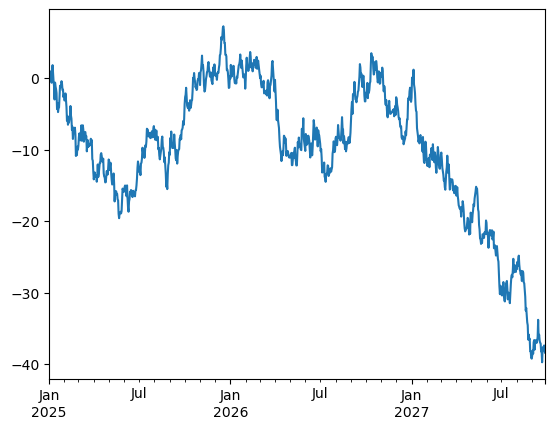

In [146]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2025", periods=1000))
ts = ts.cumsum()
ts.plot();

<Figure size 640x480 with 0 Axes>

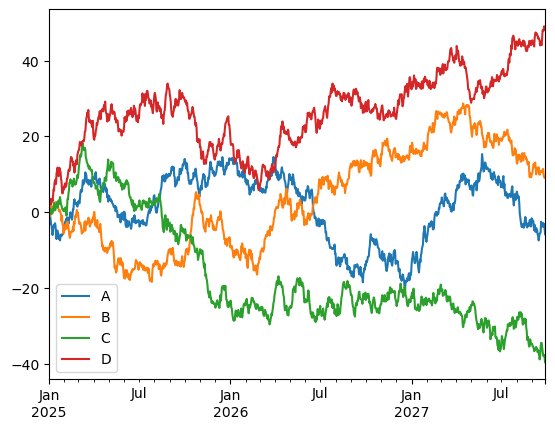

In [149]:
# plot all columns

df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');